In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [136]:
df = pd.read_csv('source/FReDA4.csv')

In [137]:
couples = df[df["Group2"] == "Couple Agreement"].copy()
mask = (
    couples.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
couples['TouchMatch'] = couples['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

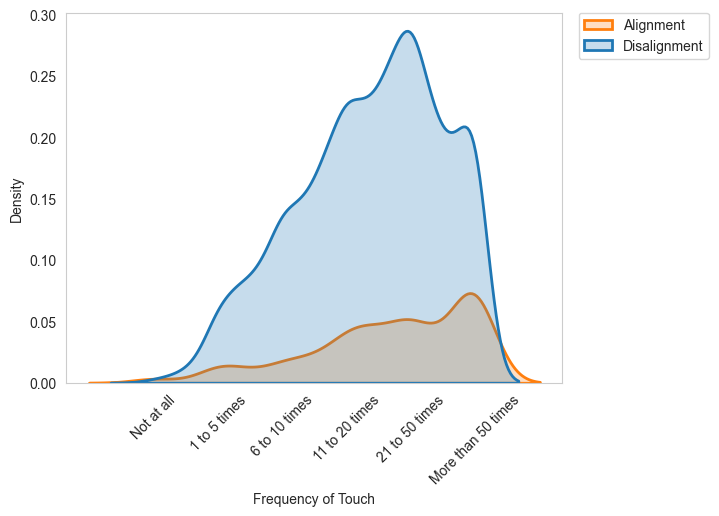

In [138]:
g = sns.kdeplot(data=couples,
                x="Frequency of Touch",
                hue="TouchMatch",
                # common_norm=False,
                bw_adjust=1,
                fill=True,
                lw=2,
                )

plt.grid(False)
x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)
x_legend = plt.legend(
    labels=['Alignment', 'Disalignment'],
    loc='upper right',
    bbox_to_anchor=(1.31, 1.02)
)

In [139]:
deprived = df[df["Group2"] == "Couple Deprivation"].copy()
mask = (
    deprived.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived['TouchMatch'] = deprived['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

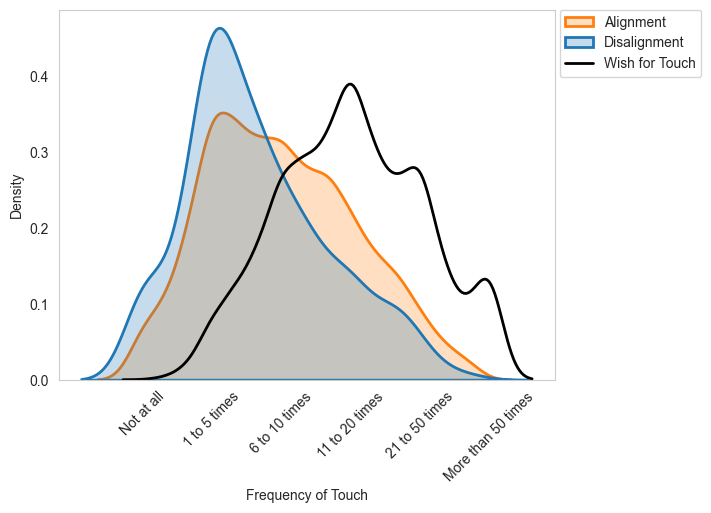

In [140]:
fig, ax = plt.subplots()
g = sns.kdeplot(data=deprived,
                x="Frequency of Touch",
                hue="TouchMatch",
                common_norm=False,
                bw_adjust=1,
                fill=True,
                lw=2,
                legend=False,
                ax=ax
                )

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)
h = sns.kdeplot(data=deprived,
                x="Wish for Touch",
                bw_adjust=1,
                fill=False,
                color="k",
                lw=2,
                ax=ax
                )
plt.grid(False)
x_legend = plt.legend(
    labels=['Alignment', 'Disalignment', 'Wish for Touch'],
    loc='upper right',
    bbox_to_anchor=(1.31, 1.02)
)

In [141]:
deprived_one = df[df["Group2"] == "One-sided Deprivation"].copy()
mask = (
    deprived_one.groupby('CoupleId')['Frequency of Touch']
    .nunique()
    .eq(1)
)
deprived_one['TouchMatch'] = deprived_one['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

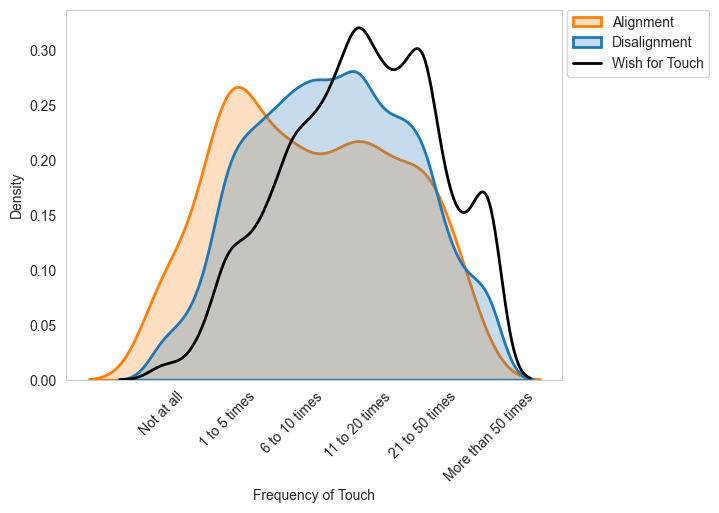

In [142]:
fig, ax = plt.subplots()
g = sns.kdeplot(data=deprived_one,
                x="Frequency of Touch",
                hue="TouchMatch",
                common_norm=False,
                bw_adjust=1,
                fill=True,
                lw=2,
                legend=False,
                ax=ax
                )

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=45
)
h = sns.kdeplot(data=deprived_one,
                x="Wish for Touch",
                bw_adjust=1,
                fill=False,
                color="k",
                lw=2,
                ax=ax
                )
plt.grid(False)
x_legend = plt.legend(
    labels=['Alignment', 'Disalignment', 'Wish for Touch'],
    loc='upper right',
    bbox_to_anchor=(1.31, 1.02)
)